In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Direct excitation

In [2]:
def rw_update_v(prev_V, Λ, λ, α):
    
    pe_V = λ - prev_V
    
    ΔV = Λ * α * pe_V
    
    V = prev_V + ΔV
        
    return V, pe_V
    

In [3]:
# Task settings
n_trials = 20  # Number of trials

# Initial values
v = np.zeros(n_trials)  # Value estimate
prediction_errors = np.zeros(n_trials)
small_lambda = np.ones(n_trials)
big_lambda = np.ones(n_trials)

# Parameters
alpha = 0.3

In [5]:
for n in range(1, n_trials):
    v[n], prediction_errors[n] = rw_update_v(v[n-1], small_lambda[n], big_lambda[n], alpha)

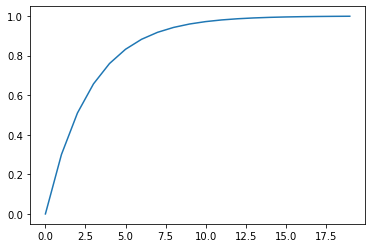

In [6]:
plt.plot(v)

In [7]:
plt.plot(pes)

NameError: name 'pes' is not defined

# Direct excitation and inhibition

In [8]:
def rw_update_vbar(prev_V, prev_Vbar, Λ, λ, α):
    
    if λ == 0:
        λbar = prev_V
    else:
        λbar = 0
        
    if Λ == 0 and prev_V > 0:
        Λbar = 1
    else:
        Λbar = 0
    
    pe_V = λ - prev_V
    pe_Vbar = λbar - prev_Vbar
    
    ΔV = Λ * α * pe_V
    ΔVbar = Λbar * α * pe_Vbar
    
    V = prev_V + ΔV
    Vbar = prev_Vbar + ΔVbar
    
    R = V - Vbar
        
    return R, V, Vbar
    

In [9]:
# Initial values
R = np.zeros(n_trials)  # Value estimate
v_excitatory = np.zeros(n_trials)
v_inhibitory = np.zeros(n_trials)
small_lambda = np.ones(n_trials)
big_lambda = np.ones(n_trials)

In [10]:
for n in range(1, n_trials):
    R[n], v_excitatory[n], v_inhibitory[n] = rw_update_vbar(v_excitatory[n-1], v_inhibitory[n-1], small_lambda[n], big_lambda[n], alpha)

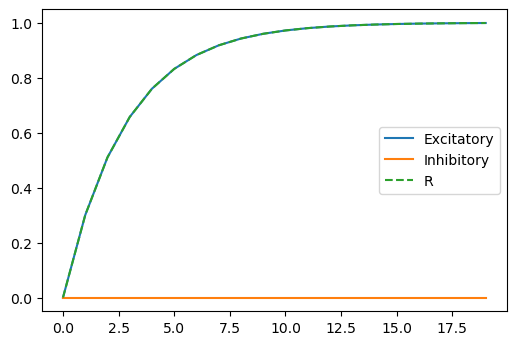

In [11]:
plt.figure(dpi=100)
plt.plot(v_excitatory, label='Excitatory')
plt.plot(v_inhibitory, label='Inhibitory')
plt.plot(R, label='R', linestyle='--')
plt.legend()

## Adding trials with no US

In [12]:
n_trials = 50
proportion_zero_trials = 0.3

n_zero_trials = int(n_trials * proportion_zero_trials)

# Initial values
R = np.zeros(n_trials)  # Value estimate
v_excitatory = np.zeros(n_trials)
v_inhibitory = np.zeros(n_trials)
small_lambda = np.ones(n_trials)
small_lambda[np.random.choice(n_trials, n_zero_trials, replace=False)] = 0
big_lambda = small_lambda

In [13]:
for n in range(1, n_trials):
    R[n], v_excitatory[n], v_inhibitory[n] = rw_update_vbar(v_excitatory[n-1], v_inhibitory[n-1], small_lambda[n], big_lambda[n], alpha)

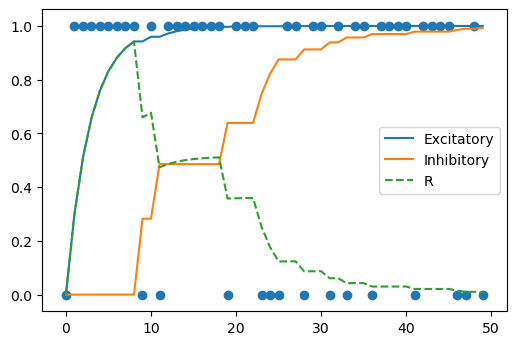

In [14]:
plt.figure(dpi=100)
plt.plot(v_excitatory, label='Excitatory')
plt.plot(v_inhibitory, label='Inhibitory')
plt.plot(R, label='R', linestyle='--')
plt.scatter(range(n_trials), small_lambda)

plt.legend()

# Direct excitation and inhibition - multiple stimuli

In [15]:
def rw_update_vbar(prev_V, prev_Vbar, Λ, λ, α):
    
    λbar = np.zeros_like(λ)
    λbar[λ == 0] = prev_V[λ == 0]
    
    Λbar = np.zeros_like(Λ)
    Λbar[(Λ == 0) & (prev_V > 0)] = 1
            
    pe_V = λ - prev_V
    pe_Vbar = λbar - prev_Vbar
    
    ΔV = Λ * α * pe_V
    ΔVbar = Λbar * α * pe_Vbar
    
    V = prev_V + ΔV
    Vbar = prev_Vbar + ΔVbar
    
    R = V - Vbar
        
    return R, V, Vbar
    

In [16]:
n_stim = 2

# Initial values
R = np.zeros((n_stim, n_trials))  # Value estimate
v_excitatory = np.zeros((n_stim, n_trials))
v_inhibitory = np.zeros((n_stim, n_trials))
small_lambda = np.zeros((n_stim, n_trials))
small_lambda[0, :] = 1
big_lambda = small_lambda

In [17]:
for n in range(1, n_trials):
    R[:, n], v_excitatory[:, n], v_inhibitory[:, n] = rw_update_vbar(v_excitatory[:, n-1], v_inhibitory[:, n-1], small_lambda[:, n], big_lambda[:, n], alpha)

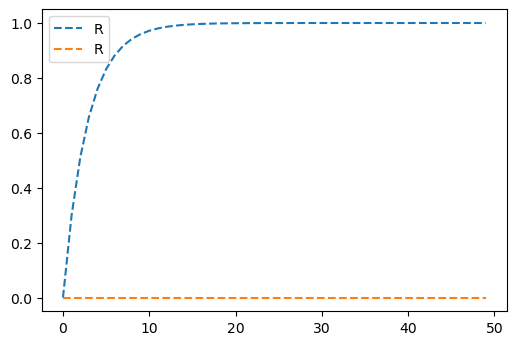

In [18]:
plt.figure(dpi=100)
# plt.plot(v_excitatory.T, label='Excitatory')
# plt.plot(v_inhibitory.T, label='Inhibitory')
plt.plot(R.T, label='R', linestyle='--')
plt.legend()

# Direct excitation and inhibition - multiple stimuli with P, N, gamma

In [73]:
def rw_update_OS(stimulus_type, prev_V, prev_Vbar, prev_P, prev_N, prev_γ, Λ, λ, α):
    
    # Define lambdas
    λbar = np.zeros_like(λ)
    λbar[λ == 0] = prev_V[λ == 0]
    
    Λbar = np.zeros_like(Λ)
    Λbar[(Λ == 0) & (prev_V > 0)] = 1
               
    # Calculate prediction error for V, Vbar, P and N
    pe_V = λ - prev_V
    pe_Vbar = λbar - prev_Vbar
    pe_P = λ - prev_P
    pe_N = λbar - prev_N
    
    # This calculates how much V, Vbar, P and N are updated on each trial
    ΔV = Λ * α * pe_V
    ΔVbar = Λbar * α * pe_Vbar
    ΔP = Λ * α * prev_γ * pe_P
    ΔN = Λbar * α * prev_γ * pe_N
    
    # Update V, Vbar, P, N
    V = np.zeros_like(prev_V)
    Vbar = np.zeros_like(prev_Vbar)
    P = np.zeros_like(prev_P)
    N = np.zeros_like(prev_N)
    
    V[stimulus_type == 0] = prev_V[stimulus_type == 0] + ΔV[stimulus_type == 0]
    Vbar[stimulus_type == 0] = prev_Vbar[stimulus_type == 0] + ΔVbar[stimulus_type == 0]
    P[stimulus_type == 1] = prev_P[stimulus_type == 1] + ΔP[stimulus_type == 1]
    N[stimulus_type == 1] = prev_N[stimulus_type == 1] + ΔN[stimulus_type == 1]
    
    # Calculate gamma
    γ = V * Vbar
    
    # Calculate response - combine value learning and occasion setting
    R = (V - Vbar) + ((P * V * γ) + (N * Vbar * γ))
        
    return R, V, Vbar, P, N, γ
    

### Model probably works, add in realistic trial outcomes

In [74]:
n_stim = 8

# Initial values
R = np.zeros((n_stim, n_trials))  # Value estimate
v_excitatory = np.zeros((n_stim, n_trials))
v_inhibitory = np.zeros((n_stim, n_trials))
P = np.zeros((n_stim, n_trials))
N = np.zeros((n_stim, n_trials))
gamma = np.zeros((n_stim, n_trials))

# Shock values
small_lambda = np.zeros((n_stim, n_trials))
small_lambda[0, :] = 1

# Assign stimulus type
# 0, 1, 3, 5 = A, B, D, F
# 2, 4 = Occasion setters, C, E
# 6, 7 = Absence of occasion setters, Cabs, Eabs
stimulus_type = np.zeros(8)
stimulus_type[[2, 4, 6, 7]] = 1

big_lambda = small_lambda

In [75]:
for n in range(1, n_trials):
    R[:, n], v_excitatory[:, n], v_inhibitory[:, n], P[:, n], N[:, n], gamma[:, n] = \
    rw_update_OS(stimulus_type, v_excitatory[:, n-1], v_inhibitory[:, n-1], P[:, -1], N[:, -1], gamma[:, -1], small_lambda[:, n], big_lambda[:, n], alpha)

No handles with labels found to put in legend.


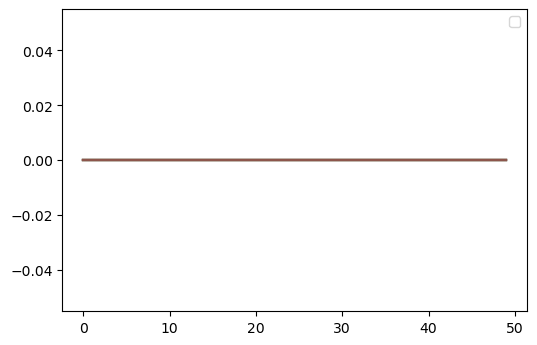

In [79]:
plt.figure(dpi=100)
# plt.plot(v_excitatory.T, label='Excitatory')
# plt.plot(v_inhibitory.T, label='Inhibitory')
# plt.plot(P.T)
# plt.plot(N.T)
plt.plot(R.T, label='R', linestyle='--')
plt.legend()

# PyMC3 stuff

In [19]:
import pymc3 as pm

C:\Users\Toby\Anaconda2\envs\mne\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)


In [20]:
n_subjects = 8
n_stim = 2

# Initial values
R = np.zeros((n_trials, n_stim, n_subjects))  # Value estimate
v_excitatory = np.zeros((n_trials, n_stim, n_subjects))
v_inhibitory = np.zeros((n_trials, n_stim, n_subjects))
small_lambda = np.zeros((n_trials, n_stim, n_subjects))
small_lambda[:, 0, :] = 1
big_lambda = small_lambda

# Parameters
# α = np.ones(n_subjects) * 0.3
α = np.random.random(n_subjects)

In [21]:
for n in range(1, n_trials):
    R[n, ...], v_excitatory[n, ...], v_inhibitory[n, ...] = rw_update_vbar(v_excitatory[n-1, ...], v_inhibitory[n-1, ...], small_lambda[n-1, ...], big_lambda[n-1, ...], α)

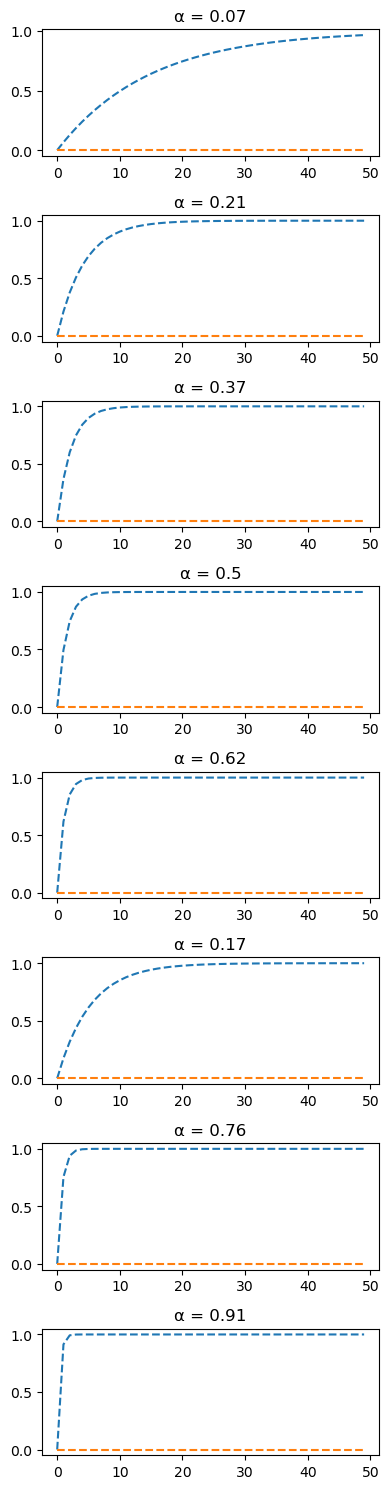

In [22]:
f, ax = plt.subplots(n_subjects, 1, figsize=(4, 15), dpi=100)
# plt.plot(v_excitatory.T, label='Excitatory')
# plt.plot(v_inhibitory.T, label='Inhibitory')
for i in range(n_subjects): 
    ax[i].plot(R[..., i], linestyle='--')
    ax[i].set_title('α = {0}'.format(np.round(α[i], 2)))
plt.tight_layout()

In [309]:
observed_R = R

In [310]:
outputs_shape = R.shape

In [311]:
original_alpha_values = α.copy()

### Create the model

In [312]:
def rw_update_vbar_pymc3(Λ, λ, R, prev_V, prev_Vbar, α):
    
    λbar = T.zeros_like(λ)
    λbar = T.set_subtensor(λbar[T.eq(λ, 0).nonzero()], prev_V[T.eq(λ, 0).nonzero()])
    
    Λbar = T.zeros_like(Λ)
    Λbar = T.set_subtensor(Λbar[(T.eq(Λ, 0) & (T.gt(prev_V, 0))).nonzero()], 1)
            
    pe_V = λ - prev_V
    pe_Vbar = λbar - prev_Vbar
    
    ΔV = Λ * α * pe_V
    ΔVbar = Λbar * α * pe_Vbar
    
    V = prev_V + ΔV
    Vbar = prev_Vbar + ΔVbar
    
    R = V - Vbar
        
    return R, V, Vbar
    

In [361]:
from theano import scan
import theano.tensor as T

with pm.Model() as model:
    
    # Learning rate lies between 0 and 1 so we use a beta distribution
    α_mean = pm.Normal('α_mean', 0.5, 10)
    α_sd = pm.HalfCauchy('α_sd', 10)
    
    α = pm.Beta('α', mu=α_mean, sigma=α_sd, shape=(n_subjects,))
    
    # Default values for R
    R = np.zeros(outputs_shape[1:])
    v_excitatory = np.zeros(outputs_shape[1:])
    v_inhibitory = np.zeros(outputs_shape[1:])
    
    # Convert task outcomes to tensors
    big_lambda = T.as_tensor_variable(big_lambda)
    small_lambda = T.as_tensor_variable(small_lambda)
    
    # Run scan
    output, updates = scan(fn=rw_update_vbar_pymc3,
                      sequences=[dict(input=big_lambda), dict(input=small_lambda)],
                      outputs_info=[R, v_excitatory, v_inhibitory],
                      non_sequences=[α])
    
    # Reshape output of the model and get categorical likelihood
    sigma = pm.HalfCauchy('sigma', 0.5)
    likelihood = pm.Normal('likelihood', mu=output[1], sigma=sigma, observed=observed_R)

### Fit the model

In [362]:
from pymc3.variational.callbacks import CheckParametersConvergence
with model:
    approx = pm.fit(method='advi', n=24000, callbacks=[CheckParametersConvergence()])
trace = approx.sample(1000)

INFO (theano.gof.compilelock): Refreshing lock C:\Users\Toby\AppData\Local\Theano\compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_78_Stepping_3_GenuineIntel-3.6.7-64\lock_dir\lock
Average Loss = inf: 100%|████████████████████████████████████████████████████████| 24000/24000 [08:17<00:00, 48.21it/s]
Finished [100%]: Average Loss = nan
INFO (theano.gof.compilelock): Refreshing lock C:\Users\Toby\AppData\Local\Theano\compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_78_Stepping_3_GenuineIntel-3.6.7-64\lock_dir\lock


C:\Users\Toby\Anaconda2\envs\mne\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\Toby\Anaconda2\envs\mne\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\Toby\Anaconda2\envs\mne\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\Toby\Anaconda2\envs\mne\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value w

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B9AD41E048>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002B9B00209B0>]], dtype=object)

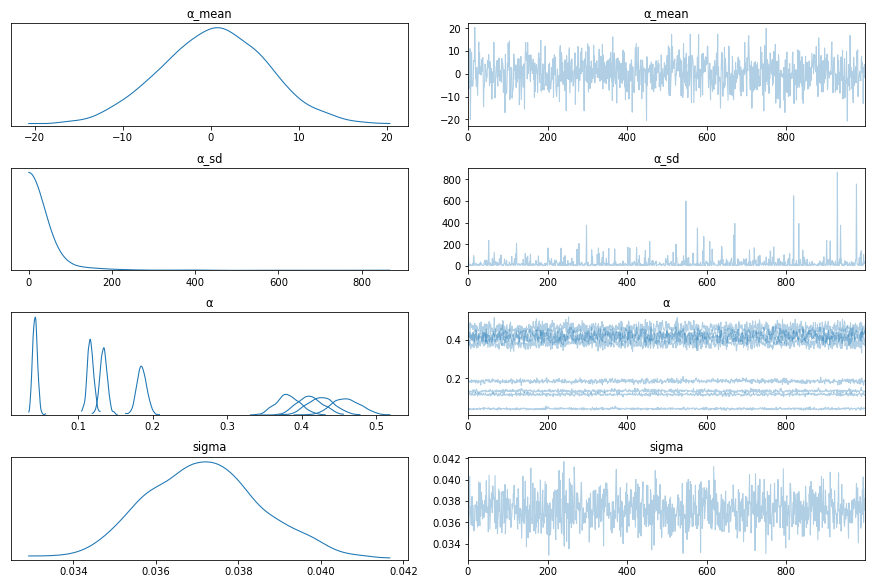

In [363]:
pm.traceplot(trace)

(array([ 1.,  2.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  1.]),
 array([ 0.04431389,  0.13248243,  0.22065096,  0.30881949,  0.39698802,
         0.48515656,  0.57332509,  0.66149362,  0.74966215,  0.83783068,
         0.92599922]),
 <a list of 10 Patch objects>)

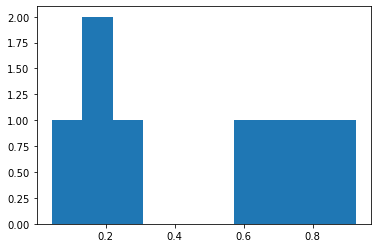

In [364]:
plt.hist(original_alpha_values)

In [365]:
fitting_results = pm.summary(trace)
fitting_results

arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shap

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
α_mean,0.328,6.267,-11.653,11.937,0.200,0.141,986.0,986.0,985.0,1025.0,NaN
α_sd,27.642,62.530,0.016,92.369,1.956,1.389,1022.0,1013.0,966.0,972.0,NaN
α[0],0.117,0.004,0.109,0.125,0.000,0.000,943.0,941.0,944.0,941.0,NaN
α[1],0.042,0.003,0.037,0.048,0.000,0.000,892.0,832.0,926.0,907.0,NaN
α[2],0.185,0.007,0.173,0.198,0.000,0.000,884.0,879.0,883.0,907.0,NaN
α[3],0.411,0.017,0.378,0.440,0.001,0.000,986.0,985.0,974.0,947.0,NaN
α[4],0.134,0.005,0.125,0.144,0.000,0.000,918.0,909.0,930.0,914.0,NaN
α[5],0.426,0.018,0.392,0.458,0.001,0.000,939.0,936.0,934.0,828.0,NaN
α[6],0.459,0.019,0.428,0.497,0.001,0.000,1165.0,1157.0,1190.0,910.0,NaN
α[7],0.382,0.016,0.351,0.410,0.001,0.000,988.0,985.0,994.0,983.0,NaN


In [366]:
fitting_results['mean'].values[:-1].shape

(10,)

In [367]:
fitting_results[['hpd_3%', 'hpd_97%']].values[2:-1].T - fitting_results['mean'].values[:-1]

array([[ -1.19810000e+01,  -2.76260000e+01,  -8.00000000e-03,
         -5.00000000e-03,  -1.20000000e-02,  -3.30000000e-02,
         -9.00000000e-03,  -3.40000000e-02,  -3.10000000e-02,
         -3.10000000e-02],
       [  1.16090000e+01,   6.47270000e+01,   8.00000000e-03,
          6.00000000e-03,   1.30000000e-02,   2.90000000e-02,
          1.00000000e-02,   3.20000000e-02,   3.80000000e-02,
          2.80000000e-02]])

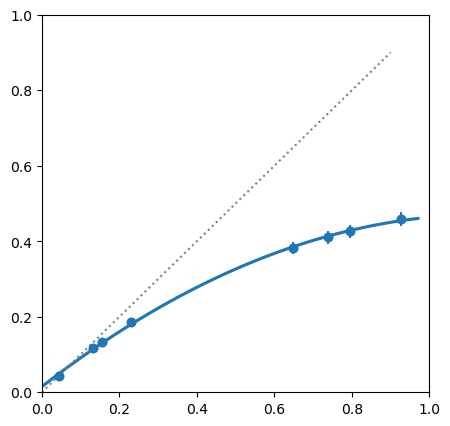

In [369]:
import seaborn as sns
plt.figure(figsize=(5, 5), dpi=100)
sns.regplot(original_alpha_values, fitting_results['mean'].values[2:-1], order=2, ci=None)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.errorbar(x=original_alpha_values, y=fitting_results['mean'].values[2:-1], yerr=fitting_results['sd'].values[2:-1], fmt='o', color='tab:blue')
plt.plot(np.arange(0, 1, 0.1), np.arange(0, 1, 0.1), linestyle=':', color='gray')

In [ ]:
?sns.regplot

In [331]:
?plt.errorbar

Signature:
plt.errorbar(
    ['x', 'y', 'yerr=None', 'xerr=None', "fmt=''", 'ecolor=None', 'elinewidth=None', 'capsize=None', 'barsabove=False', 'lolims=False', 'uplims=False', 'xlolims=False', 'xuplims=False', 'errorevery=1', 'capthick=None', '*', 'data=None', '**kwargs'],
)
Docstring:
Plot y versus x as lines and/or markers with attached errorbars.

*x*, *y* define the data locations, *xerr*, *yerr* define the errorbar
sizes. By default, this draws the data markers/lines as well the
errorbars. Use fmt='none' to draw errorbars without any data markers.

Parameters
----------
x, y : scalar or array-like
    The data positions.

xerr, yerr : scalar or array-like, shape(N,) or shape(2,N), optional
    The errorbar sizes:

    - scalar: Symmetric +/- values for all data points.
    - shape(N,): Symmetric +/-values for each data point.
    - shape(2,N): Separate - and + values for each bar. First row
        contains the lower errors, the second row contains the
        upper errors.
    -